In [1]:
import networkx as nx
import random as rn
import statistics as st
import matplotlib.pyplot as plt

The network generator from the previous homeworks:

In [2]:
def Network_of_N_nodes(N, num_of_neighbors):
    g = nx.Graph()
    for i in range(0, N):
        g.add_node(i)
    
    for j in range(0, N):
        for l in range(1, num_of_neighbors+1):
            upper = j+l
            if j+l>=N:
                upper=(j+l)-N
            g.add_edge(j, upper)
    return g

The generator function from the previous homework. It's purpose is to construct and average the different graphs for different Ns:

In [3]:
def generator():
    avg_dict={}
    #To only generate graphs with even number of nodes.
    for i in range(6,100,2):
        avg = []
        for j in range(0, 40):
            G = Network_of_N_nodes(i, 2)
            recursive(G, list(G.nodes()))
            c = nx.average_clustering(G)
            avg.append(c)
        a = st.mean(avg)
        avg_dict[i]=a
    return avg_dict

I decided to construct the edge adding function from scratch. If we want to add N/2 edges and distribute these shortcut edges evenly we need an even number of nodes. To construct a graph with the shortcut edges, we basically need to fin a perfect pairing in the graph, but pay attention not to pair nodes together that already have an edge between them.

The **possible_pairs** function determines whether there is a shortcut edge to draw or not. \
**G**: G is the graph in which we want to exemine if it is possible to draw another shortcut edge.\
**all_nodes**: a list containing the nodes that need a shortcut edge, for the shortcut edges to be evenly distributed.\
The function returns *True* if there is at least one edge to draw, and *False* if there aren't any possible edges.

In [4]:
def possible_pairs(G, all_nodes):
    for k in range(0, len(all_nodes)):
        for l in range(0, len(all_nodes)):
            #The edge between the 2 nodes is a shortcut edge, if it doesn't already exist in G and if it is not a self-loop.
            if (not G.has_edge(all_nodes[k], all_nodes[l])) & k!=l:
                return True
    return False

The **create_pairings** function returns the list of possible nodes as tupples, between which a shortcut edge can go. \
**G**: The graph in which we are looking for shortcut edges. \
**all_nodes**: the list containing all the nodes that don't have a shortcut edge yet. \
The function returns *pairings*, a list of tupples.

In [5]:
def create_pairings(G, all_nodes):
    pairings = []
    for j in range(0, len(all_nodes)):
        for l in range(j+1, len(all_nodes)):
            #The edge is a new shortcut edge if it is not a self-loop and is not in G already. j<l is there to make sure we don't list
            #the same edge twice in pairings.
            if (not G.has_edge(all_nodes[j], all_nodes[l])) & (j<l):
                pairings.append((all_nodes[j], all_nodes[l]))
    return pairings
            

The recursion itself.

In [6]:
def recursive(G, all_nodes):
    #it stops if there is no possible edge to draw between two nodes that need another edge and haven't been previously connected.
    if (not possible_pairs(G, all_nodes)):
        #the first reason why there couldn't be another pair, is that the algorithm had already found a perfect pairing, and there 
        #are no nodes left in the all_nodes, who need a pair. In this case, the problem is solved, we just need to return the correct
        #graph, which is exactly the one that we got as a parameter.
        if len(all_nodes)==0:
            return G
        #the other possibility is when there are nodes who need pairing, but there is no possible pairing between them. This means, that
        #because of the steps taken before this step, we got to a point, where there is no other possibility but to backtrack and change
        #one or more steps(drawn edges) in order not to get to a deadlock.
        else:
            return None
    #If there is at least one but possibly more edges that we can draw in the G graph and get shortcut edges, we need to first examine
    #what are the possible edges and choose one from them at random. After choosing one, we need to call the same function (recursive)
    #with the chosen edge in it, and examine the situation there. However, the recursive function will return, and we will have to
    #examine whether the choice we made in this step led to a perfect pairing (then return the graph) ir whether it led to a deadlock
    #in the latter case, we have to choose another edge to draw at random. If we run out of possible edges, we have to return with None,
    #to signal that drawing the edge that led to the parameter G graph was what possibly caused the deadlock.
    else:
        #Generating all the possible correct node pairings that we can choose in G graph (the possible shortcut edges)
        pairs = list(nx.non_edges(G))
        num_of_original_pairs = len(pairs)
        #We might have to try all possible edges sequentially.
        for i in range(0, num_of_original_pairs):
            #index stands for a random number between 0 and the number of pairs originally.
            index = rn.randint(0, len(pairs)-1)
            #We add the randomly chosen shortcut edge to graph G.
            G.add_edge(pairs[index][0], pairs[index][1])
            #We have to remove the 2 nodes from all_nodes, as they don't need a shortcut edge anymore.
            all_nodes.remove(pairs[index][0])
            all_nodes.remove(pairs[index][1])
            #we have to call the recursive function
            product = recursive(G, all_nodes)
            #We have to check what the recursive function returned with.
            #If it returned with None then the previously drawn shortcut edge leads to a deadlock. Therefore, we should not draw that one.
            #We have to delete the edge, delete the option from pairs, and put both nodes back to the nodes needing a shortcut edge list.
            if product is None:
                G.remove_edge(pairs[index][0], pairs[index][1])
                all_nodes.append(pairs[index][0])
                all_nodes.append(pairs[index][1])
                pairs.remove(pairs[index])
            #However, if the function returned with a graph, that means, we have a perfect pairing in that graph! In this case we just
            #need to return the graph(product).
            else:
                return product
        #If we tried every possible pair and got a deadlock for each shortcut edge, we have to return that the edge that led to here has
        #to be deleted as it only caused deadlocks.
        return None
     
        

Testing the recursive function:

In [7]:
G = Network_of_N_nodes(100, 2)
H = recursive(G, list(G.nodes()))
for i in range(0, len(list(H.nodes))):
        print(H.degree[i])
#nx.draw(H)

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [8]:
avg_dict = generator()

Calculating an average for multiple Ns, and plotting them out to see the values. The red line is at 0.3, the theoretical estimate. The values seemingly converge to 0.3. However, there are small spikes all over the network, i.e. at N=18, where the average clustering coefficient is bigger than at N=16. I can only explain this by the randomness of the functions used, as we didn't calculate and average a clustering coefficient for every possible network for every N. 

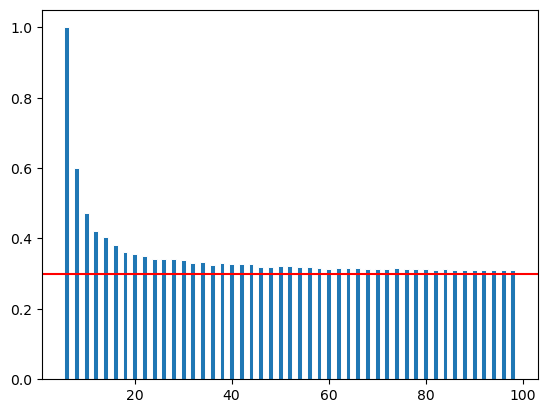

In [9]:
fig, ax = plt.subplots()

ax.bar(avg_dict.keys(), avg_dict.values(), width=1, edgecolor="white", linewidth=0.7)
plt.axhline(y=0.3, color='r')
plt.show()

The last step is to examine the exact values for a few, increasing Ns like we did during the class. My algorithm turned out to be very slow for Ns bigger then 1000, that is the reason why that is the biggest value examined.

In [10]:
N_values = [10,20,100, 500, 1000]
values = []
for N in N_values:
    G = Network_of_N_nodes(N, 2)
    values.append(nx.average_clustering(recursive(G, list(G.nodes()))))

10
20
100
500
1000


The above values on a plot. Tha average clustering coefficient seemingly converges to 0.3.

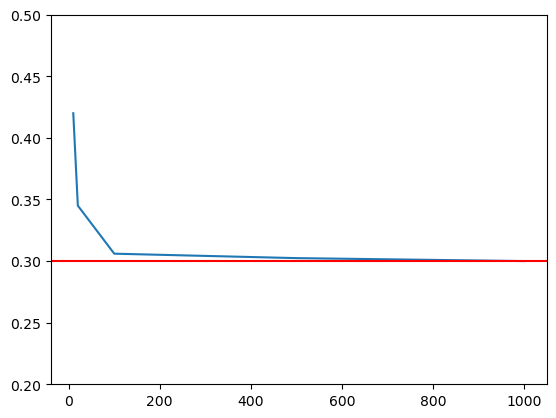

In [11]:
plt.plot(N_values, values)
plt.ylim(0.2, 0.5)
plt.axhline(y=0.3, color='r')

In [12]:
print(values)

[0.41999999999999993, 0.345, 0.3060000000000005, 0.3024, 0.30000000000000565]


This way our estimate is around 0.3 +/- 0.01, just as in the theoretical explanation.